<a href="https://colab.research.google.com/github/felipe-gm/ifusp_fiscomp_1/blob/master/2020_03_25/Questao1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related third party imports

In [0]:
from numpy import array, arange
import matplotlib.pyplot as plt

Variaveis globais

In [0]:
a = .0        # Inicio do intervalo da variavel independente 
b = 30.       # Final do intervalo da variavel independente
N = 1000      # Numero de passos da integracao numerica
h = (b-a)/N   # Tamnho de um passo de integracao

Constantes

In [0]:
alpha, beta, gamma, delta = 1, .5, .5, 2

# Programa

In [0]:
def f(r,t):
    """Modelo predador-presa de Lotka-Volterra.
    Neste modelo, as presas se reproduzem a uma taxa proporcional a sua 
    populacao, mas sao devorados pelos predadores a uma taxa proporcional
    tanto a sua populacao quanto a populacao de predadores:
    dx/dt = alpha*x - beta*x*y
    em que alpha e beta sao constantes. Ao mesmo tempo que, os predadores se
    reproduzem a uma taxa proporcional a taxa com que devoram presas, mas 
    tambem morrem de velhice a uma taxa proporcional a sua propria 
    populacao:
    dy/dt = gamma*x*y - delta*y
    em que tambem gamma e delta sao constantes.

    Positional arguments:
    r -- vetor de proporcoes do tamanho entre as duas especies (type
    numpy.ndarray)
    t -- tempo (type float)
    """
    x, y = r[0], r[1]
    fx, fy = alpha*x - beta*x*y, gamma*x*y - delta*y
    return array([fx,fy], float)

In [0]:
def passo_rk4(f,r,t,h):
    """Calcula um passo no metodo de RK4

    Positional arguments:
    f -- equacao de difereca multidimensional (type function)
    r -- vetor de proporcoes do tamanho entre as duas especies (type
    numpy.ndarray)
    t -- tempo (type float)
    h -- tamnho de um passo de integracao (type float)
    """
    k1 = h*f(r,t)
    k2 = h*f(r+.5*k1,t+.5*h)
    k3 = h*f(r+.5*k2,t+.5*h)
    k4 = h*f(r+k3,t+h)
    return (k1+2.*(k2+k3)+k4)/6.

In [0]:
t_rk4 = arange(a,b,h)
x_rk4, y_rk4 = [], []

Condicoes iniciais (e.g.: r(a))

In [0]:
ra = array([2.,2.],float)
r = ra

Loop da integracao numerica

In [0]:
for t in t_rk4:
    x_rk4.append(r[0])
    y_rk4.append(r[1])
    r += passo_rk4(f,r,t,h)

Plot

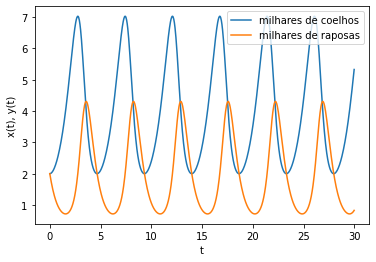

In [0]:
plt.plot(t_rk4, x_rk4, label='milhares de coelhos')
plt.plot(t_rk4, y_rk4, label='milhares de raposas')
plt.xlabel("t")
plt.ylabel("x(t), y(t)")
plt.legend(loc='upper right')
plt.show()

# Descricao

Dadas as constantes da simulacao, para condicoes iniciais propostas, os
predadores nao encontram alimento suficiente e sua populacao diminui.
Para as presas, em primeiro momento, a presenca de predadores eh escassa
e sua populacao aumenta.

Com o crescimento da populacao de presas, a diminuicao da quantidade de
predadores desacelera até que para. O crescimento da populacao de presas
continua, provocando o crescimento da populacao de predadores. Isto
desacelera o crescimento da populacao de presas ate que para e comeca a
diminuir.

A diminuicao de presas desacelera o crescimento de predadores ate que o
para e provoca sua diminuicao tambem. Para este conjunto de constantes,
a diminuicao de ambas as especies perdura ate que as condicoes inicias
se repitam, formando o intervalo de periodicidade da solucao.